# IBM Cloud Deployment

Team ID : PNT2022TMID46690

In [1]:
!pip install tensorflow --upgrade

     |████████████████████████████████| 578.1 MB 36 kB/s /s eta 0:00:01eta 0:01:17██                          | 107.9 MB 85.8 MB/s eta 0:00:06MB 85.8 MB/s eta 0:00:06MB 85.8 MB/s eta 0:00:05█▏                    | 201.1 MB 11.2 MB/s eta 0:00:34| 276.8 MB 101.3 MB/s eta 0:00:03 104.7 MB/s eta 0:00:02████▏         | 400.4 MB 104.7 MB/s eta 0:00:02 457.6 MB 104.7 MB/s eta 0:00:02��██████████████████▉    | 502.1 MB 109.8 MB/s eta 0:00:01MB 109.8 MB/s eta 0:00:01██████▍ | 548.8 MB 126.0 MB/s eta 0:00:01██████▊ | 555.4 MB 126.0 MB/s eta 0:00:01███████ | 558.5 MB 126.0 MB/s eta 0:00:01███████ | 562.0 MB 126.0 MB/s eta 0:00:01�████████████████▌| 569.4 MB 126.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 55.5 MB/s eta 0:00:01
     |████████████████████████████████| 5.9 MB 35.1 MB/s eta 0:00:01          | 1.6 MB 35.1 MB/s eta 0:00:01
     |████████████████████████████████| 14.1 MB 41.6 MB/s eta 0:00:01
     |████████████████████████████████| 124 kB 82.4 MB/s eta 0:00:01
     

      Successfully uninstalled keras-2.7.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.7.2
    Uninstalling tensorflow-2.7.2:
      Successfully uninstalled tensorflow-2.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.7.3 requires tensorflow<2.8,>=2.7.0, but you have tensorflow 2.10.1 which is incompatible.
tensorflow-metadata 1.5.0 requires absl-py<0.13,>=0.9, but you have absl-py 1.3.0 which is incompatible.
autoai-ts-libs 1.1.9 requires tensorflow<2.8,>=2.7.0; python_version >= "3.9", but you have tensorflow 2.10.1 which is incompatible.


# Understanding The Data

### Importing the required libraries

In [2]:
import numpy
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils

2022-11-17 20:08:39.550735: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ibm/dsdriver/lib:/opt/oracle/lib:/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow
2022-11-17 20:08:39.588897: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-17 20:08:40.399059: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ibm/dsdriver/lib:/opt/oracle/lib:/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow
2022-11-17 20:08:40.399241: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could 

### Loading the data

In [3]:
(X_train, y_train), (X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


### Analyzing the data

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
y_train[0]

5

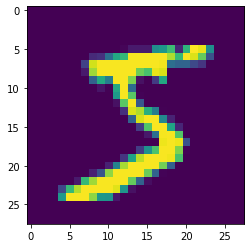

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])


### Reshaping the data

In [8]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

### Applying One Hot Encoding

In [9]:
number_of_classes = 10
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes)

In [10]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Model Building

In [12]:
model = Sequential()

### Add CNN Layers

In [13]:
model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(number_of_classes, activation ='softmax'))

### Compiling the Model

In [14]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

### Train the Model

In [15]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 190s 101ms/step - loss: 0.2407 - accuracy: 0.9518 - val_loss: 0.0884 - val_accuracy: 0.9715
Epoch 2/5
1875/1875 [==============================] - 187s 100ms/step - loss: 0.0631 - accuracy: 0.9810 - val_loss: 0.0774 - val_accuracy: 0.9762
Epoch 3/5
1875/1875 [==============================] - 185s 99ms/step - loss: 0.0426 - accuracy: 0.9867 - val_loss: 0.0827 - val_accuracy: 0.9771
Epoch 4/5
1875/1875 [==============================] - 187s 100ms/step - loss: 0.0349 - accuracy: 0.9893 - val_loss: 0.0859 - val_accuracy: 0.9766
Epoch 5/5
1875/1875 [==============================] - 186s 99ms/step - loss: 0.0250 - accuracy: 0.9923 - val_loss: 0.0822 - val_accuracy: 0.9795


### Observing the Metrics

In [16]:
metrics = model.evaluate(X_test, y_test, verbose=0)
print("Metrics(Test loss & Test Accuracy): ")
print(metrics)

Metrics(Test loss & Test Accuracy): 
[0.08217914402484894, 0.9794999957084656]


### Test the Model

In [17]:
from keras.models import load_model
import matplotlib.pyplot as plt

In [18]:
prediction=model.predict(X_test[6000:6001])
print(prediction)

1/1 [==============================] - 0s 101ms/step
[[4.6511790e-15 1.5054593e-14 9.0581275e-12 2.1795479e-04 9.7968318e-03
  3.5781619e-07 1.4601289e-15 1.3203780e-07 3.8959664e-05 9.8994571e-01]]


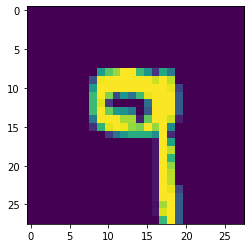

In [19]:
plt.imshow(X_test[6000])

In [20]:
import numpy as np
print(np.argmax(prediction,axis=1))


[9]


In [21]:
np.argmax(y_test[6000:6001]) #printing the actual labels

9

### Saving the Model

In [22]:
model.save('models/mnistCNN.h5')

In [23]:
cd models

/home/wsuser/work/models


In [24]:
!tar -zcvf handwritten-digit-recognition-model_new.tgz mnistCNN.h5

mnistCNN.h5


In [25]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 13.7 MB/s eta 0:00:01


### Cloud Deploy

In [26]:
from ibm_watson_machine_learning import APIClient
credentials ={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"O5lKYVGuT23aoLU0MpW_xB0_RJ7-WTy14YVEmyujSu5_"
}
client = APIClient(credentials)
client

In [27]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:us-south:a/45a1676424864afaa5858e1e069ed3bb:a72c1c19-05f3-4404-ae60-f6df81c3e0b7::',
      'guid': 'a72c1c19-05f3-4404-ae60-f6df81c3e0b7',
      'name': 'Watson Machine Learning-bf',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'digitrecognition',
    'scope': {'bss_account_id': '45a1676424864afaa5858e1e069ed3bb'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': 'f0375bb0-213d-4163-9a08-dfcd19708bd6',
      'bucket_region': 'us-south',
      'credentials': {'admin': {'access_key_id': 'bbafd0d9eb10408bb51ab13e931afe83',
        'api_key': 'Z4iNfYuOsJz3eQ9k-XzN7DKw-TAgcFSjmYbwSHXXI34I',
        'secret_access_key': '35fb356b46490e65a26fb94c15ef70e9c5ce8e239d8421bd',
        'service_id': 'ServiceId-43235abe-bf97-449e-919d-565c9f841daa'},
       'editor': {'access_key_id': '524a043672ca449980ef5e2289082ced',
        'api

In [28]:
def guid_from_space_name(client,deploy):
  space = client.spaces.get_details()
  return (next(item for item in space['resources'] if item['entity']['name']==deploy)['metadata']['id'])

In [29]:
space_uid = guid_from_space_name(client,'digitrecognition')
print("Space UID = " + space_uid)

Space UID = 878049b2-2fb6-460e-9087-211815ef0f23


In [30]:
client.set.default_space(space_uid)

'SUCCESS'

In [31]:
client.software_specifications.list(limit=100)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [32]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [33]:
model_details = client.repository.store_model(model='handwritten-digit-recognition-model_new.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN Digit recognition model",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [34]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-17T20:28:53.214Z',
  'id': 'aa595b6a-9841-4302-afb9-0c31449fb0af',
  'modified_at': '2022-11-17T20:28:56.853Z',
  'name': 'CNN Digit recognition model',
  'owner': 'IBMid-66100460MZ',
  'resource_key': 'a70cb91e-4c25-49c8-a305-49b0c4453b80',
  'space_id': '878049b2-2fb6-460e-9087-211815ef0f23'},
 'system': {'warnings': []}}

In [35]:
model_id = client.repository.get_model_id(model_details)
model_id

'aa595b6a-9841-4302-afb9-0c31449fb0af'

In [36]:
client.repository.download(model_id,'DigitRecog_IBM_model.tar.gz')

Successfully saved model content to file: 'DigitRecog_IBM_model.tar.gz'


'/home/wsuser/work/models/DigitRecog_IBM_model.tar.gz'

In [37]:
ls

DigitRecog_IBM_model.tar.gz                  mnistCNN.h5
handwritten-digit-recognition-model_new.tgz


### Test with saved model

In [38]:
from tensorflow.keras.models import load_model
model = load_model("mnistCNN.h5")
from PIL import Image
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd




In [39]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='is_QZGPyU8oxZr3W-td-LCHXS3QPMaWArILi18FdSyGT',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.ap.cloud-object-storage.appdomain.cloud')

bucket = 'handwrittenimagerecognition-donotdelete-pr-8tlrnykut46vpi'
object_key = 'mnist-dataset-1024x424 (2).png'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']



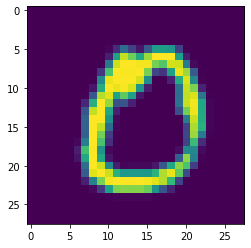

In [40]:
img = Image.open(streaming_body_1).convert("L") # convert image to monochrome
img = img.resize( (28,28) ) # resizing of input image
plt.imshow(img)

In [41]:
im2arr = np.array(img) #converting to image
im2arr = im2arr.reshape(1, 28, 28, 1) #reshaping according to our requirement


In [42]:
pred = model.predict(im2arr)
print(pred)

1/1 [==============================] - 0s 92ms/step
[[1.0000000e+00 1.4236375e-13 4.9989163e-10 3.9920029e-14 4.1606627e-15
  2.3366691e-11 2.2870287e-11 6.7615390e-16 5.2198610e-09 1.6114585e-09]]


In [43]:
print(np.argmax(pred, axis=1)) 

[0]
